## Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split

## Reading and Understanding the data

In [2]:
df = pd.read_csv('BikeSharingDataset.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [8]:
df.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Data Preprocessing And Cleaning

In [10]:
#Creating a copy of the original 
df_dup = df
df_dup.drop_duplicates(subset=None, inplace=True)
#Checking the dataframe
df_dup.shape

(730, 16)

In [11]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
varlist=['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'cnt']

In [13]:
df_new=df[varlist]

In [14]:
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
# Viewing the dataset before conversion
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [16]:
# convert into categories
df_new.season=df_new.season.astype('category')
df_new.weekday=df_new.weekday.astype('category')
df_new.weathersit=df_new.weathersit.astype('category')
df_new.mnth=df_new.mnth.astype('category')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [17]:
#creating dummies for the category variable
#we also drop the first variable as (n-1)
df_new=pd.get_dummies(df_new, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

In [18]:
df_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,False,False,...,False,False,False,False,False,False,False,True,True,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,...,False,False,False,False,True,False,False,False,False,False


In [19]:
#cheking of the numerical variables
df_new.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [20]:
# selecting numerical variable
num_vars=df_new[['temp', 'atemp', 'hum', 'windspeed',
       'cnt', ]]
num_vars.head()

,temp,atemp,hum,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


## Data Visualization

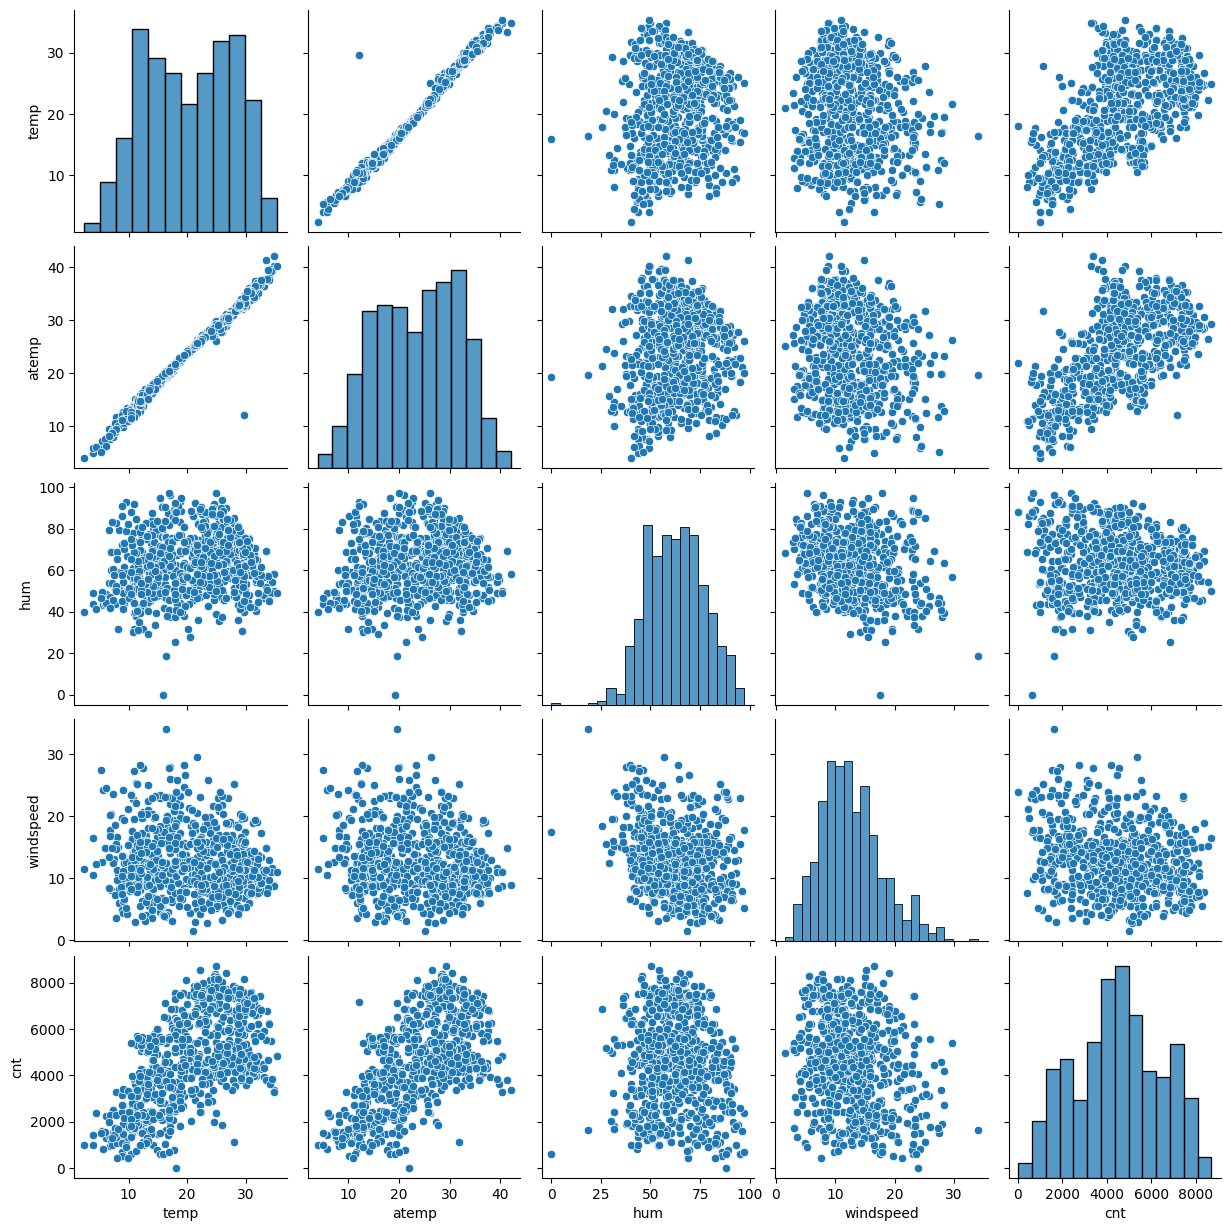

In [21]:
#Creating a pairplot
sns.pairplot(num_vars)
plt.show()

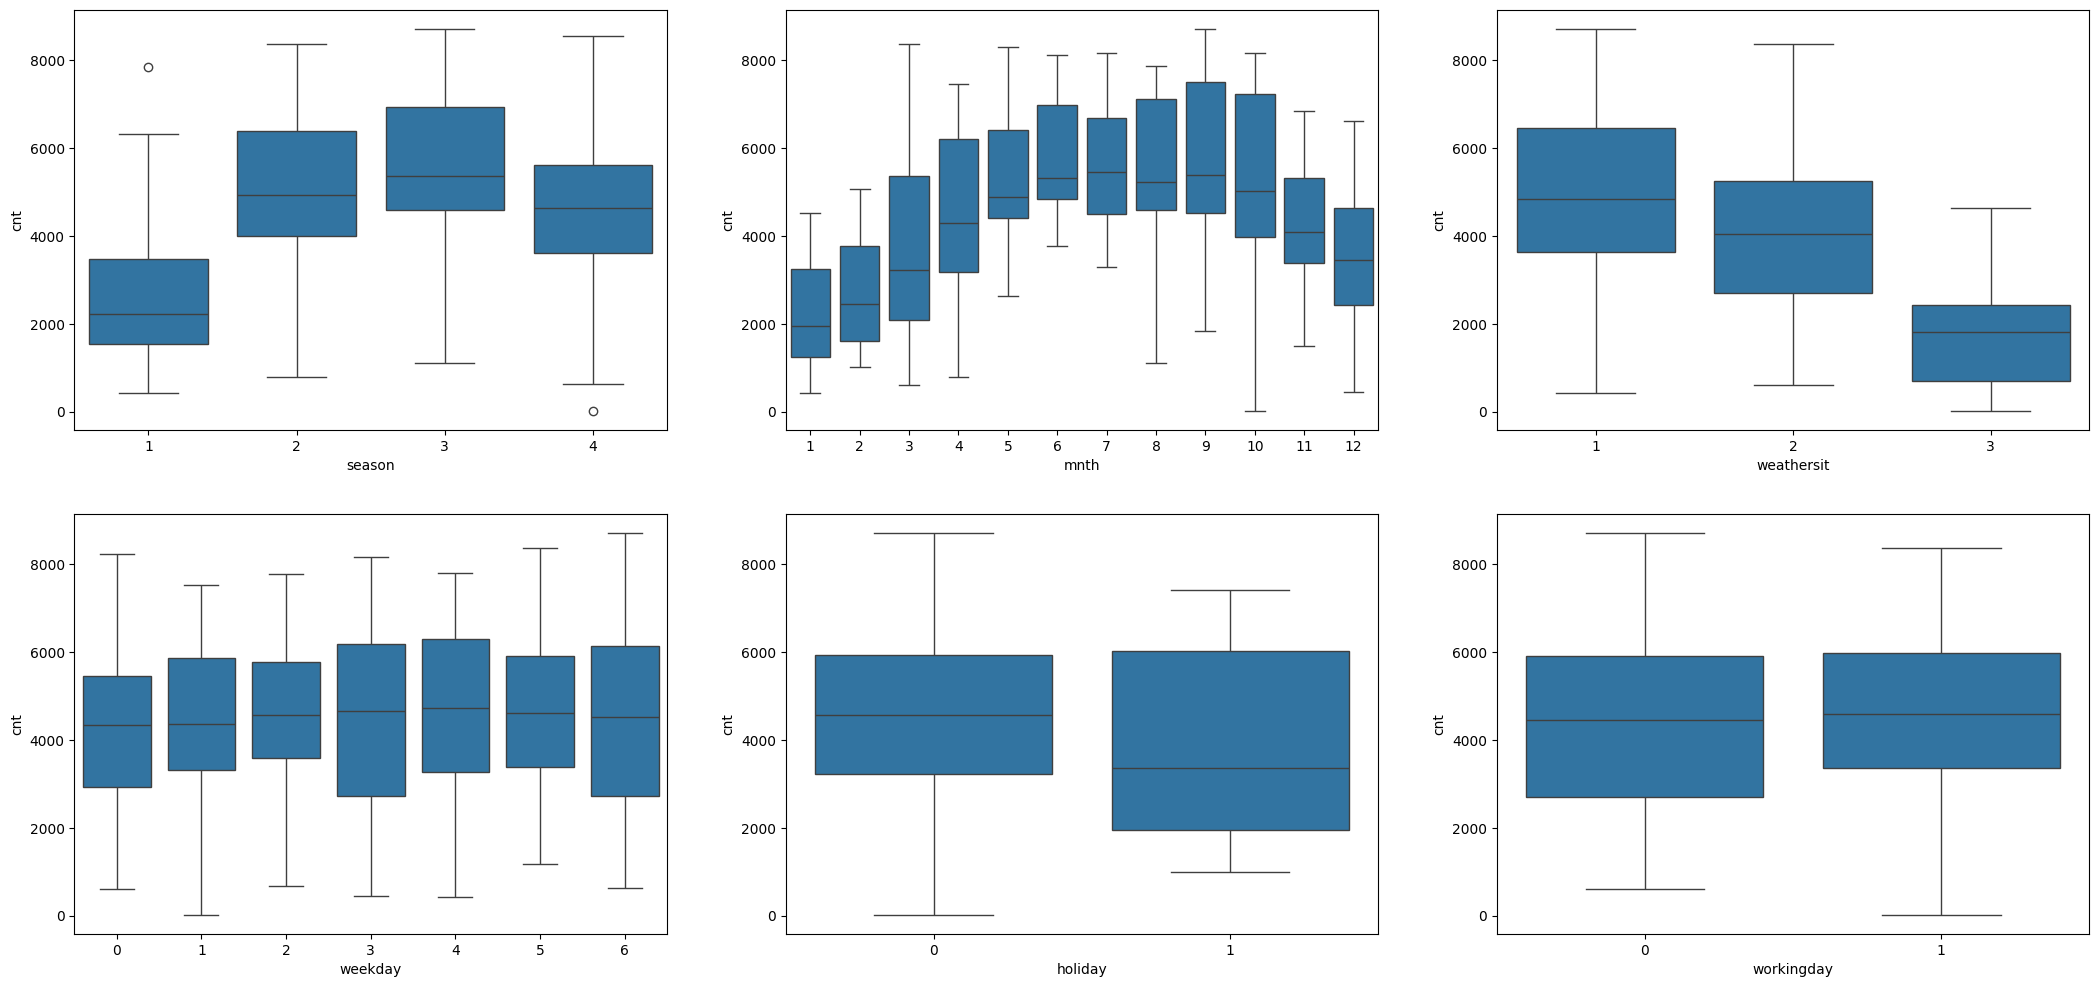

In [22]:
plt.figure(figsize=(26,12))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='mnth',y='cnt', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='weathersit',y='cnt', data=df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt', data=df)

plt.subplot(2,3,5)
sns.boxplot(x='holiday',y='cnt', data=df)

plt.subplot(2,3,6)
sns.boxplot(x='workingday',y='cnt', data=df)

plt.show()

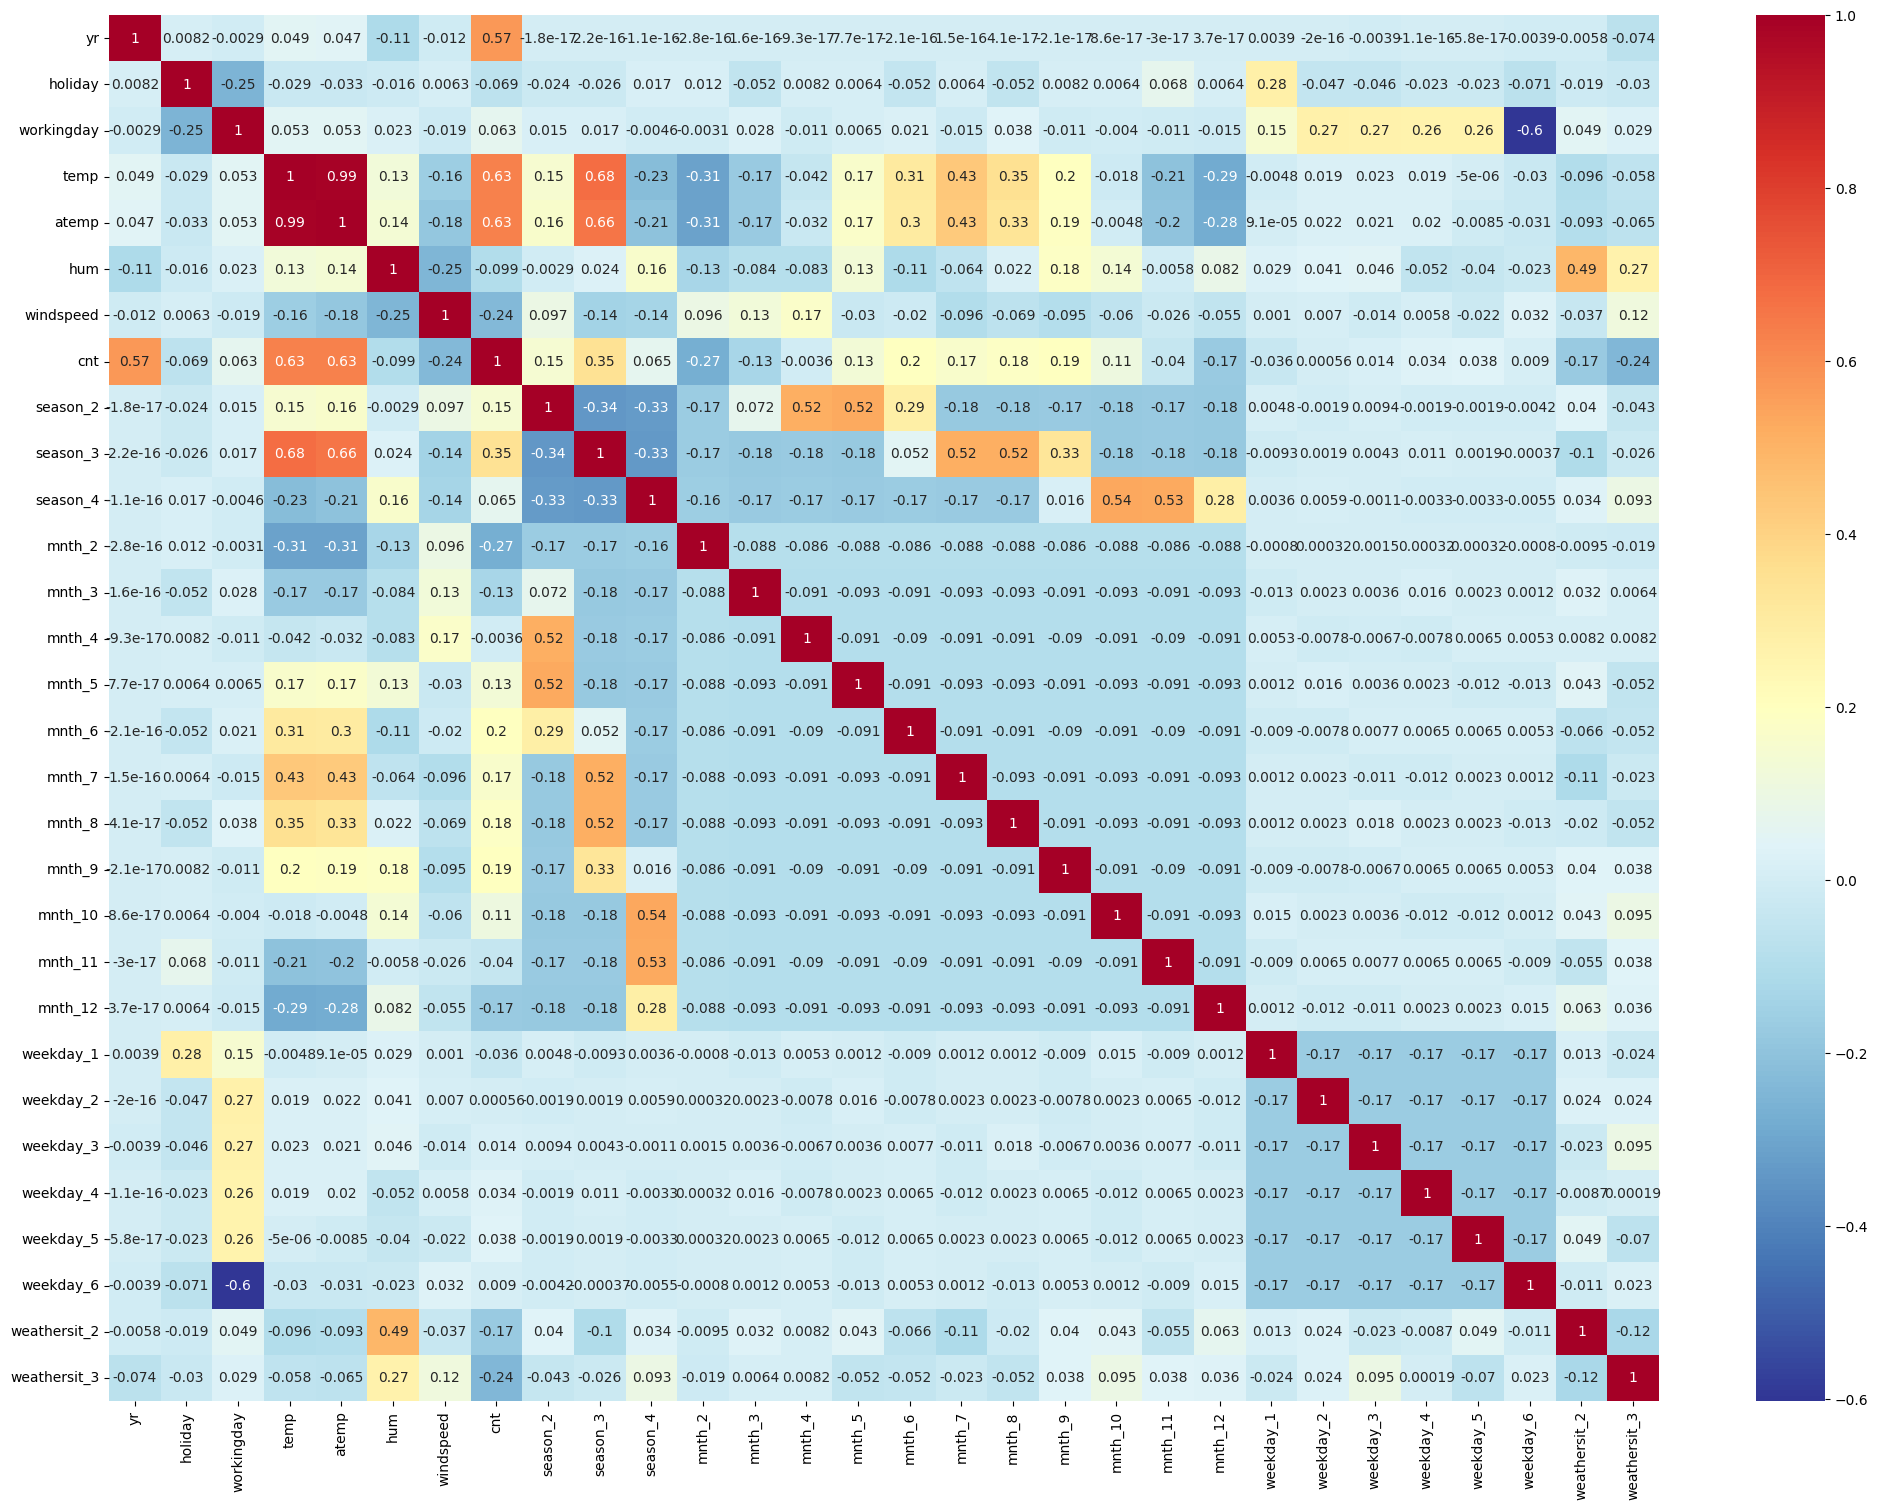

In [23]:
# Checking the correlation among different variables 
plt.figure(figsize=(25,18))
sns.heatmap(df_new.corr(), annot=True, cmap='RdYlBu_r')
plt.show()

In [24]:
df_new.shape

(730, 30)

In [25]:
# Splitting the data using the train_test_split method
df_train, df_test = train_test_split(df_new, train_size=0.7, test_size=0.3, random_state=0)

In [26]:
# Checking the shape of train and test 
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
# Looking the before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,27.606653,31.53460,60.5000,16.958236,5130,False,True,...,False,False,False,False,True,False,False,False,False,False
524,1,0,0,29.144153,32.41835,43.7083,9.667229,7498,True,False,...,False,False,False,False,False,False,False,True,False,False
12,0,0,1,6.765000,7.54415,47.0417,20.167000,1406,False,False,...,False,False,False,False,False,True,False,False,False,False
161,0,0,0,29.725000,33.90190,65.4583,10.374950,4966,True,False,...,False,False,False,False,False,False,False,True,False,False
556,1,0,1,29.383347,32.51355,63.3333,10.166111,7264,False,True,...,False,False,False,False,True,False,False,False,False,False


In [29]:
# Instantiate an object
scaler=MinMaxScaler()
# Create a list for numeric variables
num_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
# checking the dataset after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
235,0,0,1,0.753859,0.731037,0.488399,0.527988,0.587667,False,True,...,False,False,False,False,True,False,False,False,False,False
524,1,0,0,0.802869,0.755332,0.254640,0.255430,0.860101,True,False,...,False,False,False,False,False,False,False,True,False,False
12,0,0,1,0.089497,0.071535,0.301044,0.647940,0.159227,False,False,...,False,False,False,False,False,True,False,False,False,False
161,0,0,0,0.821384,0.796115,0.557424,0.281887,0.568799,True,False,...,False,False,False,False,False,False,False,True,False,False
556,1,0,1,0.810494,0.757949,0.527842,0.274080,0.833180,False,True,...,False,False,False,False,True,False,False,False,False,False


In [30]:
# Separating the variables into Independent variable X and target variable y for building the linear model.
y_train=df_train.pop('cnt')
X_train=df_train

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Calling the LinearRegression function from SciKit Learn

lm=LinearRegression()
lm.fit(X_train, y_train)

# Running the RFE function
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe=rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', np.True_, np.int64(1)),
 ('holiday', np.False_, np.int64(6)),
 ('workingday', np.False_, np.int64(5)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_2', np.True_, np.int64(1)),
 ('season_3', np.True_, np.int64(1)),
 ('season_4', np.True_, np.int64(1)),
 ('mnth_2', np.False_, np.int64(12)),
 ('mnth_3', np.True_, np.int64(1)),
 ('mnth_4', np.True_, np.int64(1)),
 ('mnth_5', np.True_, np.int64(1)),
 ('mnth_6', np.False_, np.int64(2)),
 ('mnth_7', np.False_, np.int64(7)),
 ('mnth_8', np.True_, np.int64(1)),
 ('mnth_9', np.True_, np.int64(1)),
 ('mnth_10', np.True_, np.int64(1)),
 ('mnth_11', np.False_, np.int64(11)),
 ('mnth_12', np.False_, np.int64(15)),
 ('weekday_1', np.False_, np.int64(13)),
 ('weekday_2', np.False_, np.int64(14)),
 ('weekday_3', np.False_, np.int64(9)),
 ('weekday_4', np.False_, np.int64(10)),
 ('weekday_5', np.False_, np.int64(8)),
 ('weekday_6', np.False_

In [34]:
# Storing the 'True' columns from the rfe.support_ list
col=X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_3'],
      dtype='object')

In [35]:
# Columns that has been excluded by the rfe.support_
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_6', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2'],
      dtype='object')

In [36]:
# Creating X_train df with the RFE selected variables
# X_train_rfe=X_train[col]

In [37]:
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

## Model 1

In [41]:
# # Adding a constant
# X_train_sm1=sm.add_constant(X_train_rfe)
# # Creating a first fitted model

# lr1=sm.OLS(y_train, X_train_sm1)

# STEP 1: Force X_train[col] to DataFrame and convert to numeric
X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')

# STEP 2: Force y_train to Series and numeric
y_train = pd.Series(y_train)
y_train = pd.to_numeric(y_train, errors='coerce')

# STEP 3: Drop any rows with NaN from both X and y
X_train_rfe['__target__'] = y_train
X_train_rfe = X_train_rfe.dropna()
y_train_clean = X_train_rfe['__target__']
X_train_rfe = X_train_rfe.drop(columns='__target__')

# STEP 4: Add constant
X_train_sm1 = sm.add_constant(X_train_rfe)

# STEP 5: Force conversion to NumPy float64 (completely avoids dtype=object issue)
X_train_sm1 = np.array(X_train_sm1, dtype='float64')
y_train_clean = np.array(y_train_clean, dtype='float64')

# STEP 6: Fit the model
lr1 = sm.OLS(y_train_clean, X_train_sm1).fit()

In [43]:
#Fitting the model using.fit() function
# lr1_model=lr1.fit()
lr1.params

array([ 0.21169728,  0.22005266, -0.11773813,  0.60470617, -0.23008065,
       -0.13008994,  0.10422676,  0.07989689,  0.14712328,  0.05012317,
        0.02761046,  0.07115205,  0.04832694,  0.11860452,  0.06233079,
       -0.14063011])

In [45]:
# displaying the summary
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     153.2
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          9.31e-175
Time:                        23:30:08   Log-Likelihood:                 497.61
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     494   BIC:                            -895.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2117      0.022      9.613      0.000       0.168       0.255
x1             0.2201      0.008     26.306      0.000       0.204       0.236
x2            -0.1177      0.242     -0.486      0.627      -0.594       0.358
x3             0.6047      0.254      2.379      0.018       0.105       1.104
x4            -0.2301      0.025     -9.222      0.000      -0.279      -0.181
x5            -0.1301      0.024     -5.321      0.000      -0.178      -0.082
x6             0.1042      0.021      5.074      0.000       0.064       0.145
x7             0.0799      0.024      3.388      0.001       0.034       0.126
x8             0.1471      0.015      9.992      0.000       0.118       0.176
x9             0.0501      0.016      3.066      0.002       0.018       0.082
x10            0.0276      0.022      1.262      0.208      -0.015       0.071
x11            0.0712      0.021      3.356      0.001       0.030       0.113
x12            0.0483      0.019      2.608      0.009       0.012       0.085
x13            0.1186      0.018      6.478      0.000       0.083       0.155
x14            0.0623      0.018      3.390      0.001       0.026       0.098
x15           -0.1406      0.030     -4.747      0.000      -0.199      -0.082
==============================================================================
Omnibus:                       88.660   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.078
Skew:                          -0.882   Prob(JB):                     1.62e-48
Kurtosis:                       5.691   Cond. No.                         135.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
X_train_rfe = pd.DataFrame(X_train_rfe)
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')

# Step 2: Drop rows with NaNs (if any)
X_train_rfe = X_train_rfe.dropna()

# Step 3: Double check data types and convert to float64 (for isfinite to work)
X_train_rfe = X_train_rfe.astype('float64')

# Step 4: VIF Calculation
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i)
              for i in range(X_train_rfe.shape[1])]
vif['VIF'] = vif['VIF'].round(2)
vif = vif.sort_values(by='VIF', ascending=False)

### Model 2

In [50]:
# Dropping the 'temp' columns because of its high VIF and high P value
X_train_new=X_train_rfe.drop(['atemp'], axis=1)

In [51]:
#Adding a constant
X_train_sm2=sm.add_constant(X_train_new)
# Creating a first fitted model
lr2=sm.OLS(y_train, X_train_sm2)

#Fitting the model using.fit() function
lr2_model=lr2.fit()

# displaying the summary result
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.2
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          1.18e-174
Time:                        23:32:39   Log-Likelihood:                 494.71
No. Observations:                 510   AIC:                            -959.4
Df Residuals:                     495   BIC:                            -895.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2297      0.021     11.060      0.000       0.189       0.271
yr               0.2202      0.008     26.195      0.000       0.204       0.237
temp             0.4530      0.034     13.441      0.000       0.387       0.519
hum             -0.2234      0.025     -8.969      0.000      -0.272      -0.174
windspeed       -0.1483      0.023     -6.358      0.000      -0.194      -0.102
season_2         0.1011      0.021      4.910      0.000       0.061       0.142
season_3         0.0763      0.024      3.228      0.001       0.030       0.123
season_4         0.1507      0.015     10.237      0.000       0.122       0.180
mnth_3           0.0529      0.016      3.230      0.001       0.021       0.085
mnth_4           0.0377      0.022      1.746      0.081      -0.005       0.080
mnth_5           0.0756      0.021      3.564      0.000       0.034       0.117
mnth_8           0.0441      0.019      2.380      0.018       0.008       0.081
mnth_9           0.1168      0.018      6.352      0.000       0.081       0.153
mnth_10          0.0641      0.018      3.472      0.001       0.028       0.100
weathersit_3    -0.1450      0.030     -4.879      0.000      -0.203      -0.087
==============================================================================
Omnibus:                       84.296   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.999
Skew:                          -0.847   Prob(JB):                     1.85e-45
Kurtosis:                       5.613   Cond. No.                         15.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# VIF checking
# Creating a dataframe that contais all the feature variable with its VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
1,temp,18.69
5,season_3,8.39
2,hum,7.00
4,season_2,6.42
3,windspeed,3.48
6,season_4,2.94
8,mnth_4,2.40
9,mnth_5,2.28
0,yr,1.96
10,mnth_8,1.70


### Model 3

In [53]:
# Dropping the 'mnth_8' columns as it has high P value
X_train_new=X_train_new.drop(['mnth_8'], axis=1)

In [54]:
#Adding a constant
X_train_sm3=sm.add_constant(X_train_new)
# Creating a first fitted model
lr3=sm.OLS(y_train, X_train_sm3)

#Fitting the model using.fit() function
lr3_model=lr3.fit()

# displaying the summary result
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     172.7
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          1.44e-174
Time:                        23:32:43   Log-Likelihood:                 491.81
No. Observations:                 510   AIC:                            -955.6
Df Residuals:                     496   BIC:                            -896.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2270      0.021     10.892      0.000       0.186       0.268
yr               0.2203      0.008     26.094      0.000       0.204       0.237
temp             0.4511      0.034     13.326      0.000       0.385       0.518
hum             -0.2172      0.025     -8.727      0.000      -0.266      -0.168
windspeed       -0.1470      0.023     -6.273      0.000      -0.193      -0.101
season_2         0.1015      0.021      4.907      0.000       0.061       0.142
season_3         0.0950      0.022      4.239      0.000       0.051       0.139
season_4         0.1519      0.015     10.280      0.000       0.123       0.181
mnth_3           0.0527      0.016      3.199      0.001       0.020       0.085
mnth_4           0.0374      0.022      1.725      0.085      -0.005       0.080
mnth_5           0.0749      0.021      3.514      0.000       0.033       0.117
mnth_9           0.1013      0.017      5.864      0.000       0.067       0.135
mnth_10          0.0625      0.019      3.374      0.001       0.026       0.099
weathersit_3    -0.1482      0.030     -4.970      0.000      -0.207      -0.090
==============================================================================
Omnibus:                       86.149   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.474
Skew:                          -0.868   Prob(JB):                     5.37e-46
Kurtosis:                       5.608   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# VIF checking & Creating a dataframe that contais all the feature variable with its VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
1,temp,18.65
5,season_3,7.42
2,hum,6.94
4,season_2,6.42
3,windspeed,3.48
6,season_4,2.93
8,mnth_4,2.40
9,mnth_5,2.28
0,yr,1.96
11,mnth_10,1.68


### Model 4

In [56]:
# Dropping the 'Season_3' columns
X_train_new=X_train_new.drop(['season_3'], axis=1)

In [57]:
# Adding Constant
X_train_sm4=sm.add_constant(X_train_new)

# Creating a first model
lr4=sm.OLS(y_train, X_train_sm4)

# fit the model
lr4_model=lr4.fit()
#summary for the model
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          6.86e-172
Time:                        23:32:46   Log-Likelihood:                 482.73
No. Observations:                 510   AIC:                            -939.5
Df Residuals:                     497   BIC:                            -884.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2170      0.021     10.308      0.000       0.176       0.258
yr               0.2169      0.009     25.378      0.000       0.200       0.234
temp             0.5674      0.020     28.192      0.000       0.528       0.607
hum             -0.2204      0.025     -8.712      0.000      -0.270      -0.171
windspeed       -0.1502      0.024     -6.305      0.000      -0.197      -0.103
season_2         0.0482      0.017      2.886      0.004       0.015       0.081
season_4         0.1229      0.013      9.227      0.000       0.097       0.149
mnth_3           0.0447      0.017      2.686      0.007       0.012       0.077
mnth_4           0.0494      0.022      2.262      0.024       0.006       0.092
mnth_5           0.0679      0.022      3.143      0.002       0.025       0.110
mnth_9           0.1171      0.017      6.825      0.000       0.083       0.151
mnth_10          0.0466      0.018      2.527      0.012       0.010       0.083
weathersit_3    -0.1459      0.030     -4.813      0.000      -0.205      -0.086
==============================================================================
Omnibus:                       70.924   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.341
Skew:                          -0.785   Prob(JB):                     7.48e-32
Kurtosis:                       5.069   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#Checking the VIF again
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,hum,6.84
1,temp,5.67
4,season_2,4.07
3,windspeed,3.42
7,mnth_4,2.37
8,mnth_5,2.27
5,season_4,2.21
0,yr,1.93
10,mnth_10,1.62
6,mnth_3,1.36


### Model 5

In [59]:
# Dropping the mnth_3
X_train_new=X_train_new.drop(['mnth_3'], axis=1)

In [60]:
# Adding a constant 
X_train_sm5=sm.add_constant(X_train_new)
#Creating the model
lr5=sm.OLS(y_train, X_train_sm5)

#Fit the model
lr5_model=lr5.fit()

#display the summary of the model
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     192.7
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          1.71e-171
Time:                        23:32:48   Log-Likelihood:                 479.06
No. Observations:                 510   AIC:                            -934.1
Df Residuals:                     498   BIC:                            -883.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2269      0.021     10.875      0.000       0.186       0.268
yr               0.2176      0.009     25.308      0.000       0.201       0.234
temp             0.5526      0.019     28.374      0.000       0.514       0.591
hum             -0.2164      0.025     -8.516      0.000      -0.266      -0.166
windspeed       -0.1473      0.024     -6.151      0.000      -0.194      -0.100
season_2         0.0617      0.016      3.846      0.000       0.030       0.093
season_4         0.1152      0.013      8.801      0.000       0.089       0.141
mnth_4           0.0297      0.021      1.433      0.153      -0.011       0.070
mnth_5           0.0504      0.021      2.432      0.015       0.010       0.091
mnth_9           0.1152      0.017      6.680      0.000       0.081       0.149
mnth_10          0.0485      0.019      2.612      0.009       0.012       0.085
weathersit_3    -0.1475      0.031     -4.834      0.000      -0.207      -0.088
==============================================================================
Omnibus:                       68.755   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.341
Skew:                          -0.750   Prob(JB):                     4.54e-32
Kurtosis:                       5.132   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#VIF checking again for the new model
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']= [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif= vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,hum,6.53
1,temp,5.39
4,season_2,3.70
3,windspeed,3.28
5,season_4,2.14
6,mnth_4,2.10
7,mnth_5,2.05
0,yr,1.92
9,mnth_10,1.62
8,mnth_9,1.23


### Model 6

In [62]:
#Dropping the 'hum' variable
X_train_new=X_train_new.drop(['hum'], axis=1)

In [63]:
#Adding a constant
X_train_sm6=sm.add_constant(X_train_new)
# Creating the model
lr6=sm.OLS(y_train, X_train_sm6)
#fit the model
lr6_model=lr6.fit()

#display the summary
lr6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     179.0
Date:                Tue, 01 Jul 2025   Prob (F-statistic):          5.36e-158
Time:                        23:32:52   Log-Likelihood:                 444.39
No. Observations:                 510   AIC:                            -866.8
Df Residuals:                     499   BIC:                            -820.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1146      0.017      6.629      0.000       0.081       0.149
yr               0.2249      0.009     24.591      0.000       0.207       0.243
temp             0.5345      0.021     25.821      0.000       0.494       0.575
windspeed       -0.0984      0.025     -3.961      0.000      -0.147      -0.050
season_2         0.0565      0.017      3.296      0.001       0.023       0.090
season_4         0.1022      0.014      7.351      0.000       0.075       0.129
mnth_4           0.0297      0.022      1.342      0.180      -0.014       0.073
mnth_5           0.0277      0.022      1.258      0.209      -0.016       0.071
mnth_9           0.0850      0.018      4.712      0.000       0.050       0.120
mnth_10          0.0383      0.020      1.936      0.053      -0.001       0.077
weathersit_3    -0.2349      0.031     -7.648      0.000      -0.295      -0.175
==============================================================================
Omnibus:                       63.874   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.247
Skew:                          -0.753   Prob(JB):                     5.72e-26
Kurtosis:                       4.790   Cond. No.                         9.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#Checking VIF again for the new model
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,season_2,3.67
1,temp,3.56
2,windspeed,3.01
5,mnth_4,2.10
6,mnth_5,2.03
0,yr,1.90
4,season_4,1.86
8,mnth_10,1.62
7,mnth_9,1.21
9,weathersit_3,1.08


## Model Evaluation

In [65]:
y_train_pred=lr6_model.predict(X_train_sm6)
res=y_train-y_train_pred


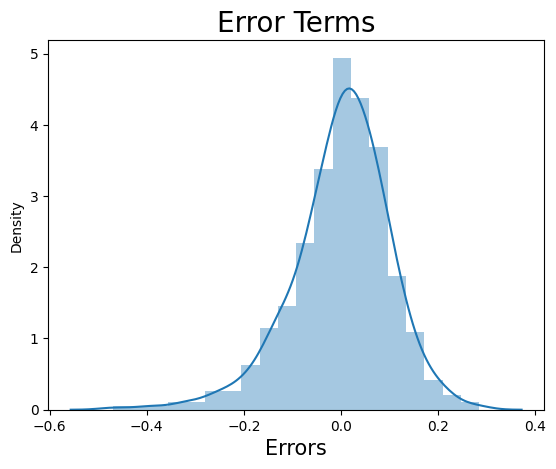

In [66]:
# Plotting the histgram
sns.distplot((res), bins=20)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=15)
plt.show()

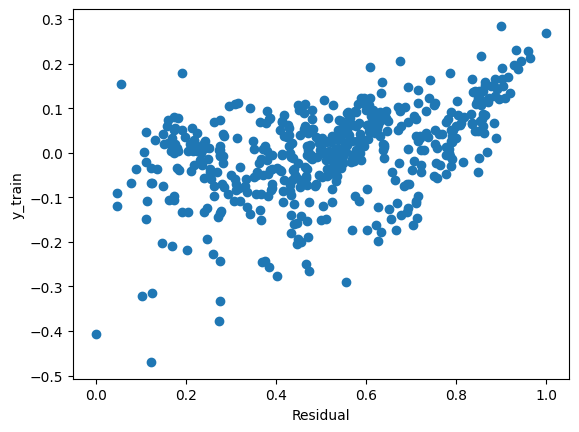

In [67]:
# Creating scatter plot for the residuals
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

Text(0, 0.5, 'y_train_pred')

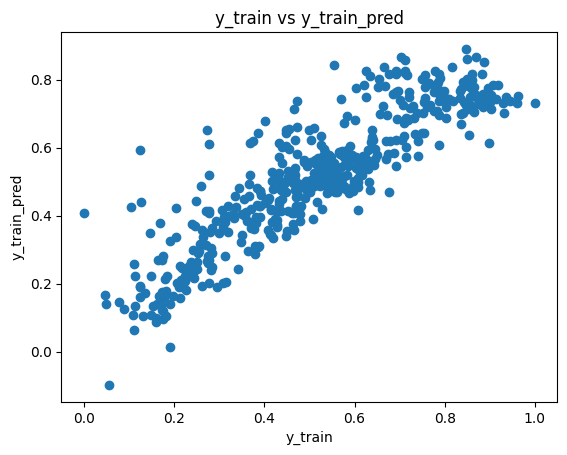

In [68]:
plt.scatter(y_train, y_train_pred)
plt.title('y_train vs y_train_pred')             
plt.xlabel('y_train')                         
plt.ylabel('y_train_pred')

In [69]:
# Cheking for the multicollinearity among the predictor variables
# VIF check
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,season_2,3.67
1,temp,3.56
2,windspeed,3.01
5,mnth_4,2.10
6,mnth_5,2.03
0,yr,1.90
4,season_4,1.86
8,mnth_10,1.62
7,mnth_9,1.21
9,weathersit_3,1.08


## Making Predictions

In [70]:
#Using the scaler.transform function for the test data
num_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
196,0,0,0,0.771285,0.741444,0.460557,0.415865,0.678900,False,True,...,False,False,False,False,False,False,False,True,False,False
187,0,0,1,0.854058,0.808256,0.552784,0.292782,0.525771,False,True,...,False,False,False,False,False,True,False,False,False,False
14,0,0,0,0.178804,0.205177,0.340487,0.289684,0.141049,False,False,...,False,False,False,False,False,False,False,True,True,False
31,0,0,1,0.125012,0.186509,0.801018,0.027323,0.153935,False,False,...,False,False,False,True,False,False,False,False,True,False
390,1,0,1,0.320391,0.353539,0.717517,0.077873,0.466291,False,False,...,False,False,False,False,False,True,False,False,True,False


In [71]:
# Statistical Analysis of the test data
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.027397,0.666667,0.537535,0.530211,0.533186,0.365412,0.520493
std,0.501140,0.163612,0.472484,0.230350,0.215531,0.206381,0.198115,0.236180
min,0.000000,0.000000,0.000000,-0.048868,-0.027173,-0.353829,-0.049874,0.067073
25%,0.000000,0.000000,0.000000,0.359598,0.370098,0.386311,0.226618,0.354809
50%,0.000000,0.000000,1.000000,0.564352,0.567870,0.529582,0.327053,0.519673
75%,1.000000,0.000000,1.000000,0.722275,0.693736,0.678414,0.463343,0.723194
max,1.000000,1.000000,1.000000,0.982573,1.019965,0.986079,1.165056,0.981707


In [72]:
y_test=df_test.pop('cnt')
X_test=df_test

In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 196 to 200
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    bool   
 8   season_3      219 non-null    bool   
 9   season_4      219 non-null    bool   
 10  mnth_2        219 non-null    bool   
 11  mnth_3        219 non-null    bool   
 12  mnth_4        219 non-null    bool   
 13  mnth_5        219 non-null    bool   
 14  mnth_6        219 non-null    bool   
 15  mnth_7        219 non-null    bool   
 16  mnth_8        219 non-null    bool   
 17  mnth_9        219 non-null    bool   
 18  mnth_10       219 non-null    boo

In [74]:
#Selecting the variables
col1=X_train_new.columns
X_test=X_test[col1]

In [75]:
# Adding constant variable to test df
X_test_sm6=sm.add_constant(X_test)
X_test_sm6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 196 to 200
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    bool   
 5   season_4      219 non-null    bool   
 6   mnth_4        219 non-null    bool   
 7   mnth_5        219 non-null    bool   
 8   mnth_9        219 non-null    bool   
 9   mnth_10       219 non-null    bool   
 10  weathersit_3  219 non-null    bool   
dtypes: bool(7), float64(3), int64(1)
memory usage: 10.1 KB


In [76]:
# Making Predictions using the final model
y_pred=lr6_model.predict(X_test_sm6)

## Model Evaluation

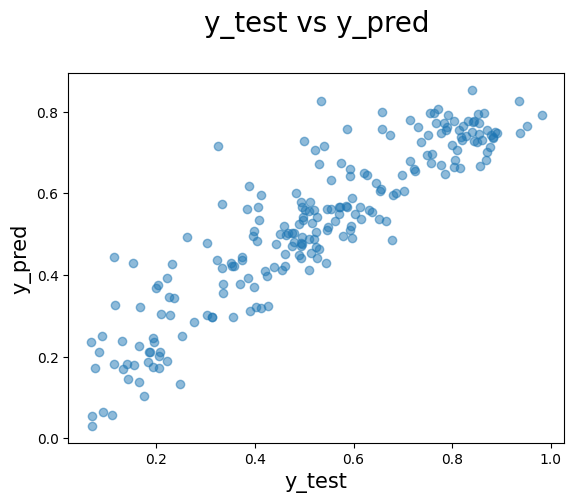

In [77]:
# Plotting y_test and y_pred
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('y_test vs y_pred\n', fontsize=20)
plt.xlabel('y_test', fontsize=15)
plt.ylabel('y_pred', fontsize=15)

plt.show()

In [78]:
r2_score(y_test, y_pred)

0.8092067257863864

#### Adjusted R^2 Value of the Test Data

In [79]:
#Shape of the test data
X_test.shape

(219, 10)

In [80]:
# Formula for R^2 adjusted: R^2 adj. = (1−(1−R^2)∗(n−1)/(n−p−1))

# Here, n is the rows & p is the columns

n = X_test.shape[0]
p = X_test.shape[1]
r2 = r2_score(y_test, y_pred)

adj_r2 = (1-(1-r2)*(n-1)/(n-p-1))
adj_r2

0.8000339722184242